In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [25]:
def System(r,x):
    
    y = r
    
    dydt = (x*y**2)-(2*y/x)-1/x**3
    
    return dydt

In [31]:
def Solucion(x):
    return (1/x**2)+(2/(-2-x**2))

In [26]:
def Integrator3(f,r0,x):
    
    h = x[1] - x[0]
    
    y = np.zeros_like(x)
    
    y[0] = r0[0]

    
    K1 = np.zeros(1)
    K2 = np.zeros(1)
    K3 = np.zeros(1)
    
    # Las pendientes instantaneas
    R = np.zeros(1)

    for i in range(1,len(x)):
        
        R = np.array([y[i-1]])
        
        K1 = f(R,x[i-1])
        
        R = np.array([y[i-1]+0.5*h*K1[0]])
        
        K2 = f(R,x[i-1]+0.5*h)
        
        R = np.array([y[i-1]-h*K1[0]+2*h*K2[0]])

        K3 = f(R,x[i-1]+h)

        y[i] = y[i-1] + (1/6)*h*(K1[0]+4*K2[0]+K3[0])

        
    return y

In [27]:
x = np.linspace(np.sqrt(2),4,100)

In [32]:
r0 = [0]
y = Integrator3(System,r0,x) 
y_ = Solucion(x)

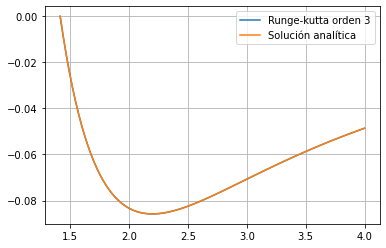

In [40]:
plt.plot(x,y,label='Runge-kutta orden 3')
plt.plot(x,y_,label='Solución analítica')
plt.legend()
plt.grid()

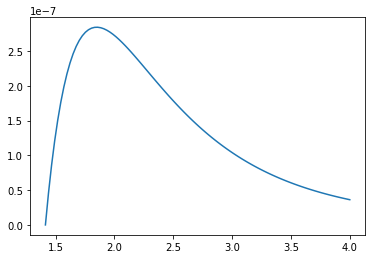

In [39]:
plt.plot(x,np.abs(y-y_))